In [1]:
import sys
sys.path.append('/home') 
import arpespythontools as arp 
from matplotlib import rcParamsDefault 
from matplotlib.ticker import AutoMinorLocator

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update(rcParamsDefault)
large = 22; med = 16; #small = 12
params = {'legend.fontsize': med,
      'figure.figsize': (8, 6),
      'axes.labelsize': med,
      'axes.titlesize': med,
      'xtick.labelsize': med,
      'ytick.labelsize': med,
      'figure.titlesize': large,
      'image.origin': 'lower',
      'xtick.major.size': 8,
      'ytick.major.size': 8,
      'xtick.major.width': 1,
      'ytick.major.width': 1,
      'xtick.minor.size': 4,
      'xtick.minor.width': 1,
      'ytick.minor.size': 4,
      'ytick.minor.width': 1,
      'axes.linewidth': 1,
      'font.family': 'sans-serif', 
      'font.sans-serif' : 'Open Sans',
      'font.weight': 'light', # ultralight, light, regular, medium, bold 
      'font.style': 'normal', # normal, italic
         }
plt.rcParams.update(params)
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 150

In [2]:
url = 'https://pranabdas.github.io/drive/datasets/arpes/sample_spectrum.txt'
# url = '/Users/Pranab/Desktop/drive/datasets/arpes/sample_spectrum.txt'
data, energy, angle = arp.load_ses_spectra(url)

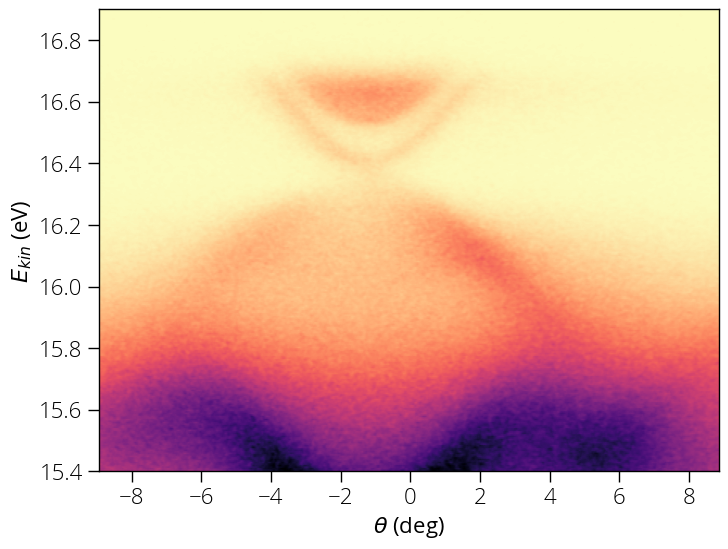

In [3]:
plt.imshow(data, origin = 'lower', aspect = 'auto', \
           extent = (angle[0], angle[-1], energy[0], energy[-1]))
plt.xlabel("$\\theta$ (deg)")
plt.ylabel('$E_{kin}$ (eV)')
plt.set_cmap('magma_r')
plt.show()

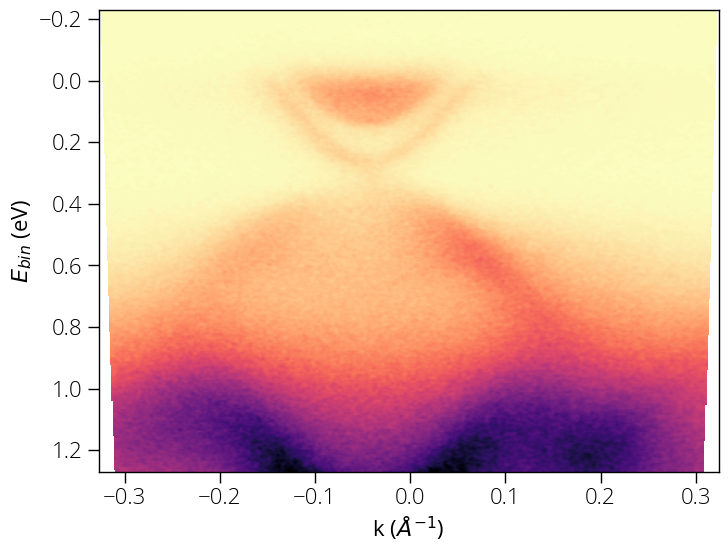

In [4]:
data_k, e_bin, k = arp.k_conv(data, energy, angle, 16.67) 
# Fermi energy = 16.67 eV

plt.imshow(data_k, origin = 'lower', aspect = 'auto', \
           extent = (k[0], k[-1], e_bin[0], e_bin[-1]))
plt.xlabel("k ($\AA^{-1}$)")
plt.ylabel('$E_{bin}$ (eV)')
plt.set_cmap('magma_r')
plt.show()

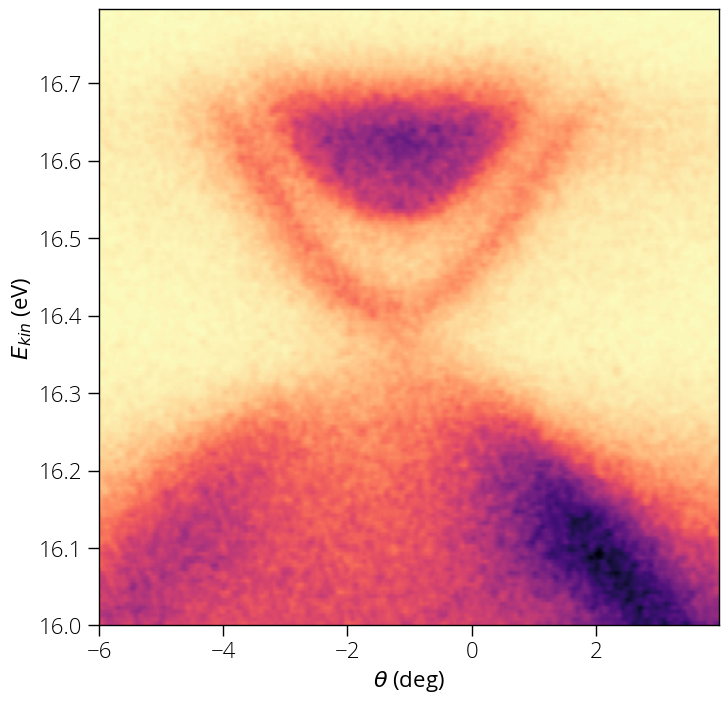

In [5]:
data_crop, x_crop, y_crop = arp.crop_2d(data, energy, angle, 16, 16.8, -6, 4)

plt.figure(figsize = (8, 8))
plt.imshow(data_crop, origin = 'lower', aspect = 'auto', \
           extent = (y_crop[0], y_crop[-1], x_crop[0], x_crop[-1]))
plt.xlabel("$\\theta$ (deg)")
plt.ylabel('$E_{kin}$ (eV)')
plt.set_cmap('magma_r')
plt.show()

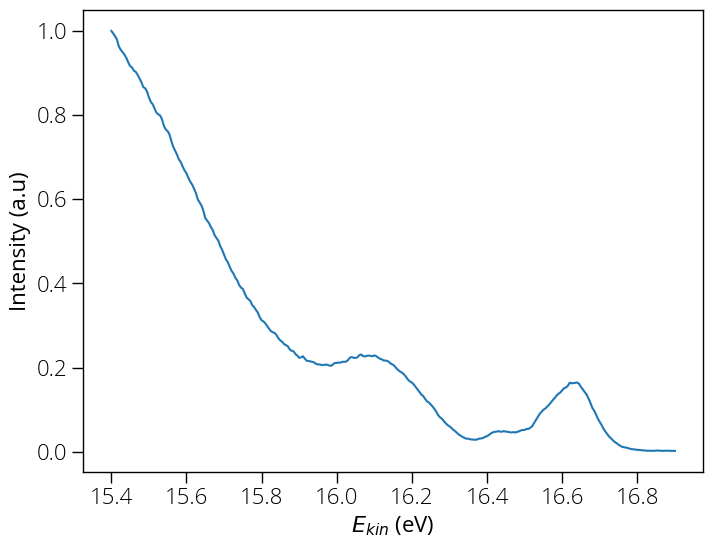

In [6]:
edc = arp.line_profile(data, angle, -3, 3)

plt.plot(energy, edc/max(edc))
plt.xlabel('$E_{kin}$ (eV)')
plt.ylabel('Intensity (a.u)')
plt.show()

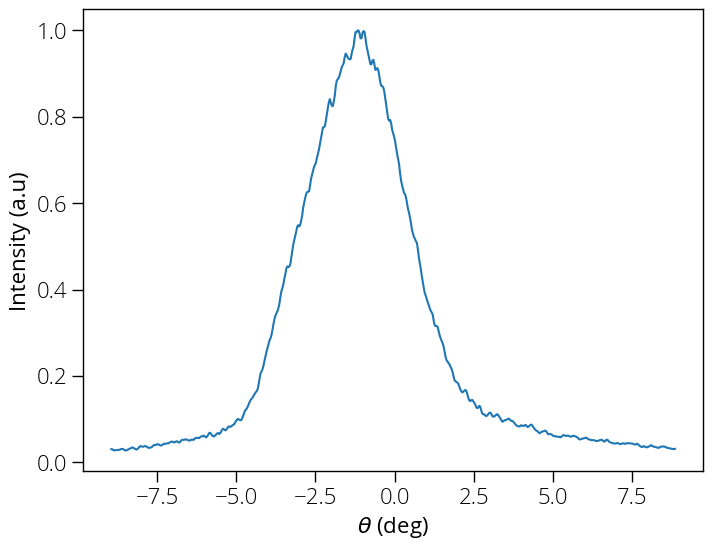

In [7]:
mdc = arp.line_profile(data.T, energy, 16.5, 16.7)

plt.plot(angle, mdc/max(mdc))
plt.xlabel('$\\theta$ (deg)')
plt.ylabel('Intensity (a.u)')
plt.show()

In [8]:
url = 'https://pranabdas.github.io/drive/datasets/arpes/sample_map_data.zip'
# url = '/Users/Pranab/Desktop/drive/datasets/arpes/sample_map_data.zip'
data, energy, theta, phi = arp.load_ses_map(url)

In [9]:
# data_k, e_bin, kx, ky = arp.k_conv3d(data, energy, theta, phi, 16.67)

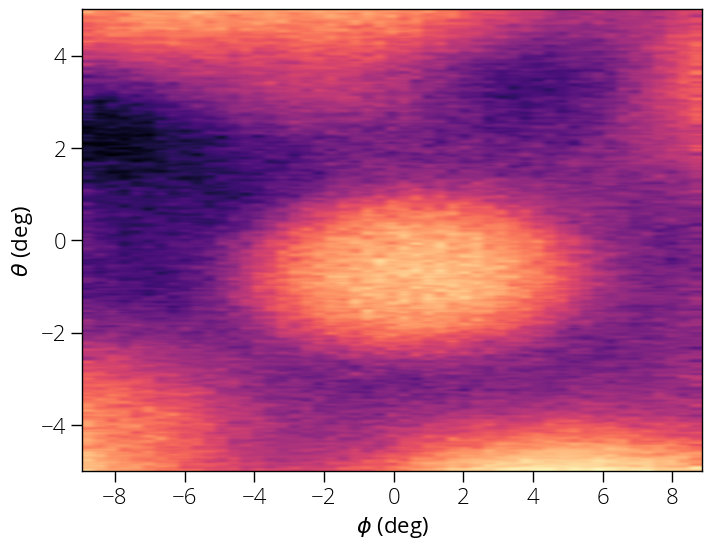

In [10]:
iso_energy_surf = arp.plane_slice(data, energy, 15.6, 15.8)
plt.imshow(iso_energy_surf, origin = 'lower', aspect = 'auto', \
            extent = (theta[0], theta[-1], phi[0], phi[-1]))
plt.xlabel('$\\phi$ (deg)')
plt.ylabel("$\\theta$ (deg)")
plt.show()

In [11]:
phi_slice = arp.plane_slice(data.transpose([2, 0, 1]), phi, -0.5, 0.5)

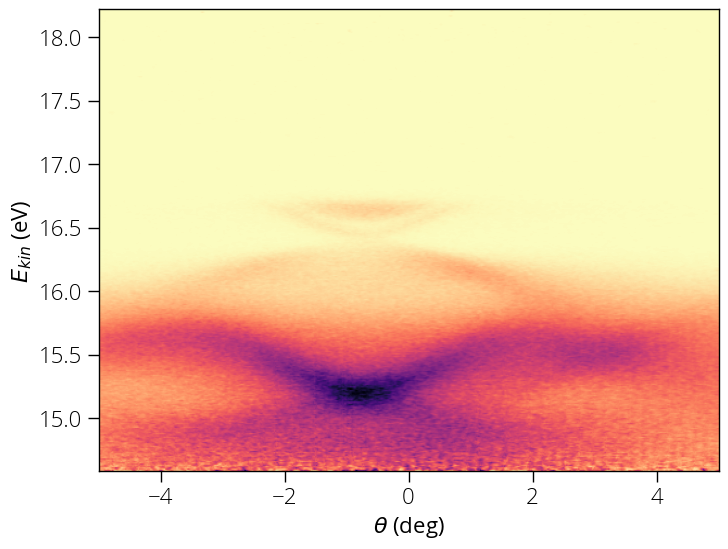

In [12]:
plt.imshow(phi_slice, origin = 'lower', aspect = 'auto', \
            extent = (phi[0], phi[-1], energy[0], energy[-1]))
plt.xlabel("$\\theta$ (deg)")
plt.ylabel('$E_{kin}$ (eV)')
plt.show()

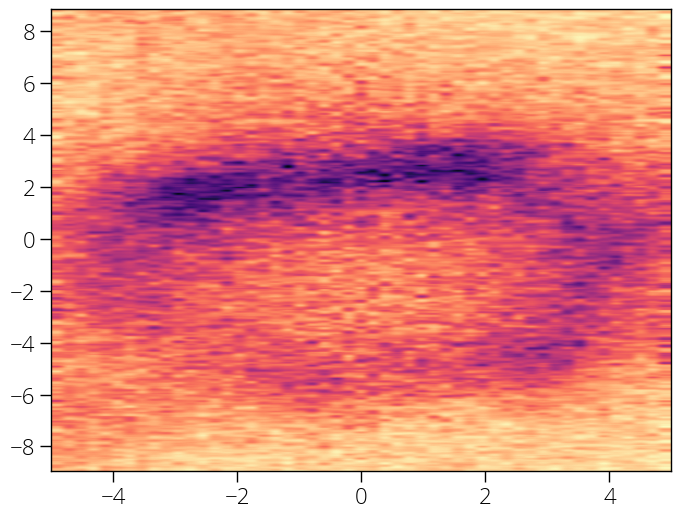

In [13]:
plt.imshow(data[150, :, :], origin = 'lower', aspect = 'auto',\
          extent = (phi[0], phi[-1], theta[0], theta[-1]))
plt.show()

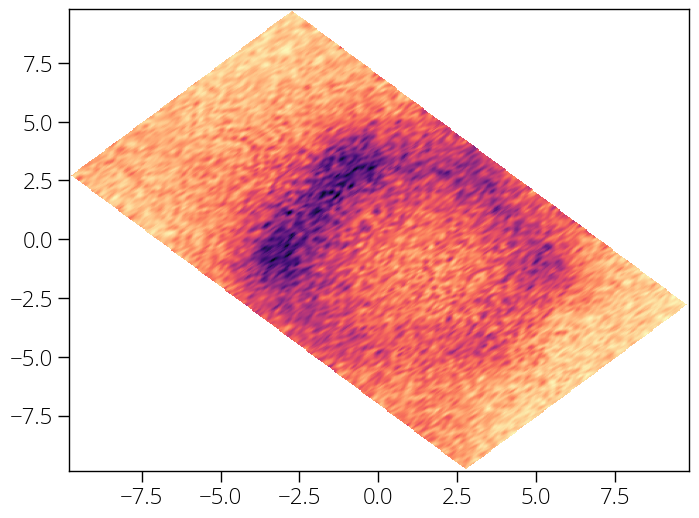

In [14]:
data_r, theta_r, phi_r = arp.rotate_2d(data[150, :, :], 45, theta, phi)

plt.imshow(data_r, origin = 'lower', aspect = 'auto',\
          extent = (phi_r[0], phi_r[-1], theta_r[0], theta_r[-1]))
plt.show()

In [15]:
data_r, theta_r, phi_r = arp.rotate_3d(data, 45, theta, phi)

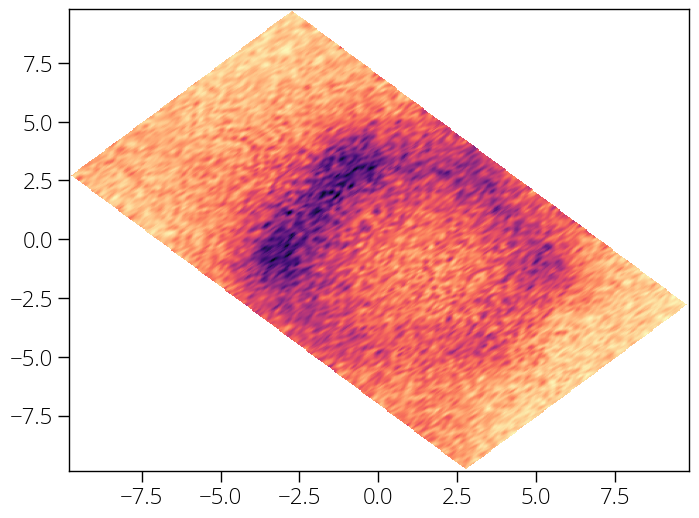

In [16]:
plt.imshow(data_r[150, :, :], origin = 'lower', aspect = 'auto',\
          extent = (phi_r[0], phi_r[-1], theta_r[0], theta_r[-1]))
plt.show()

In [17]:
import numpy as np
edc = np.sum(data, axis=1)
mdc = np.sum(data, axis=0)

In [2]:
url = 'https://pranabdas.github.io/drive/datasets/arpes/sample_spectrum.txt'
# url = '/Users/Pranab/Desktop/drive/datasets/arpes/sample_spectrum.txt'
data, energy, angle = arp.load_ses_spectra(url)

In [3]:
diff2 = arp.laplacian(data, energy, angle)

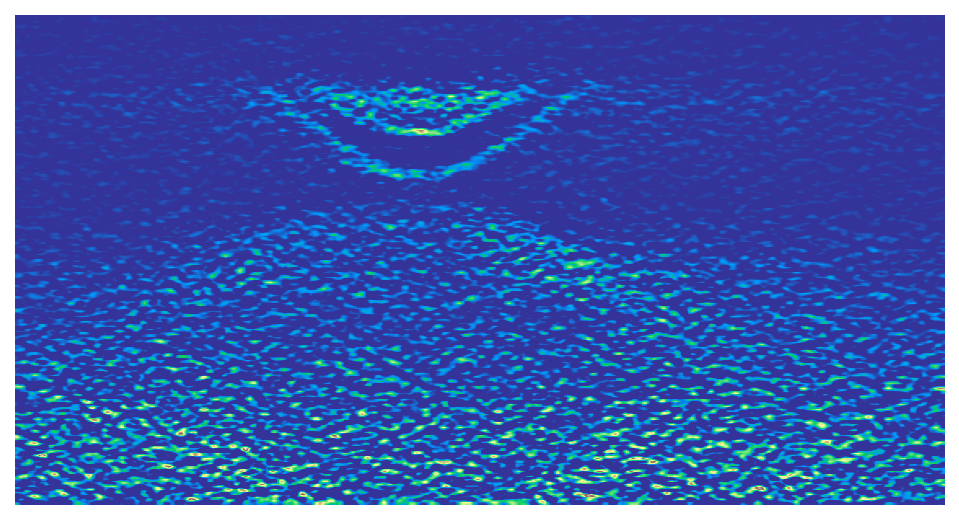

In [4]:
plt.imshow(diff2, vmax=0, cmap='terrain_r')
plt.axis('off')
plt.show()

In [5]:
cv2d = arp.cv2d(data, energy, angle)

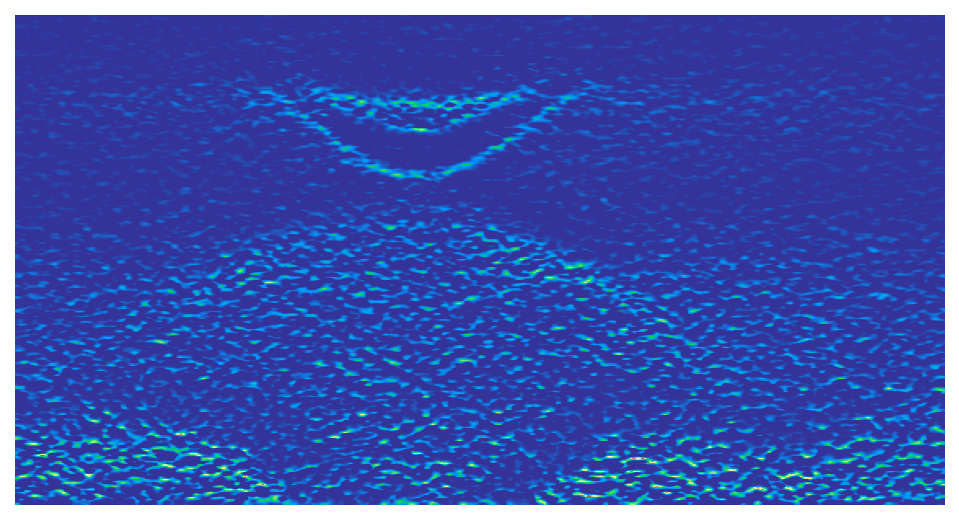

In [6]:
plt.imshow(cv2d, vmax=0, cmap="terrain_r")
plt.axis('off')
plt.show()